# Decision Boundaries

To plot decision boundaries in python, one has to understand the following concepts
* subplots
* meshgrid
* unravel
* np.c_

# Subplots

Subplots are basically used to create a set of figures in the same figure object, i.e side by side or one below the other


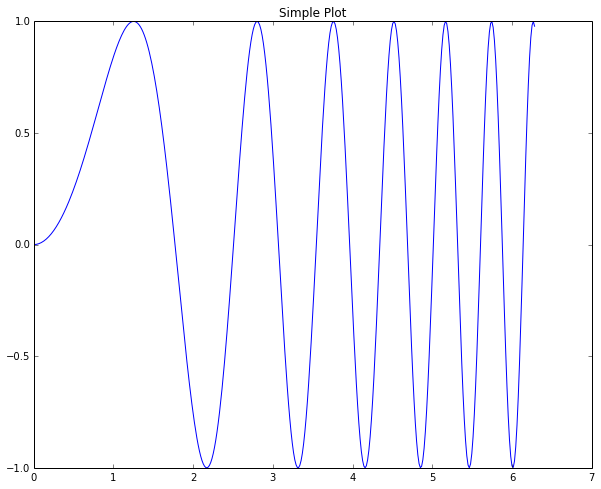

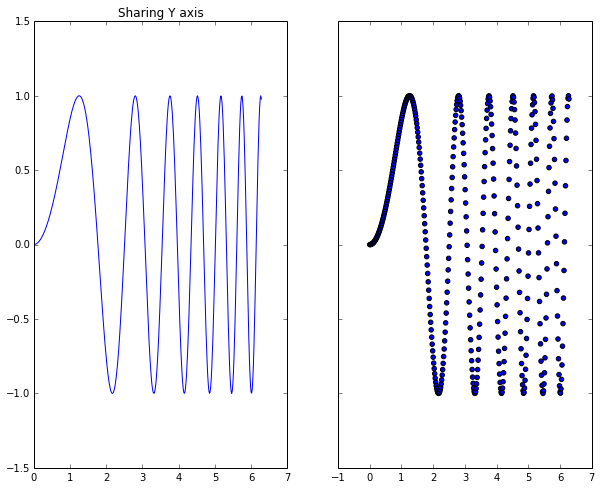

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Display plots inline
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

x = np.linspace(0,2*np.pi,400)
y = np.sin(x**2)


fig,ax = plt.subplots()
ax.plot(x,y)
ax.set_title('Simple Plot')

f,(ax1, ax2) = plt.subplots(1,2,sharey=True)
ax1.plot(x,y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x,y)


Testing a simple decision boundary using python

In [195]:
import sklearn
import sklearn.datasets
import sklearn.linear_model
from scipy.special import expit
import itertools
import random

(300, 2)


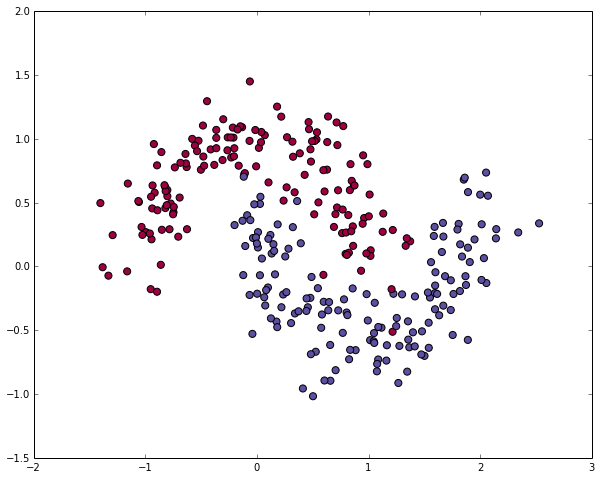

In [196]:
# Create a random dataset and plot it

np.random.seed(0)
X,y = sklearn.datasets.make_moons(300,noise=0.20)

plt.scatter(X[:,0],X[:,1],s=50,c=y,cmap=plt.cm.Spectral)
print X.shape


In [197]:
# Lets try a logistic regression classifier

clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [198]:
# Create a meshgrid of values

x_min,x_max = X[:,0].min() -1, X[:,0].max() + 1
y_min,y_max = X[:,1].min() -1, X[:,1].max() + 1

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))

Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

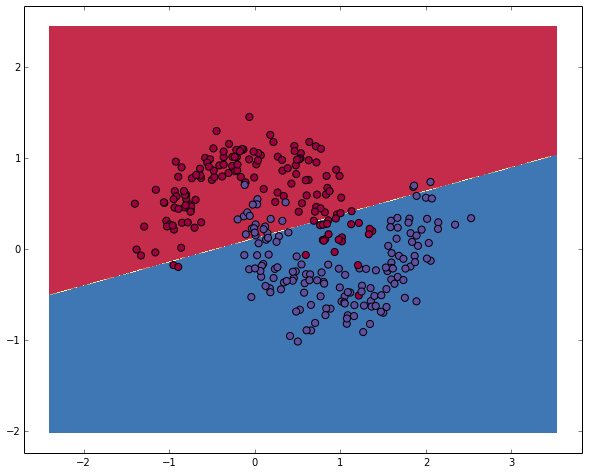

In [199]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:,0],X[:,1],s=50,c=y,cmap=plt.cm.Spectral)

In [200]:
Nh = 3 #Number of neurons in the hidden layer
eta = 0.01
epoch = 10
num_classes = len(np.unique(y))
print num_classes

2


In [201]:
def sigmoid_output_derivative(output):
    """ calculates the derivative part for backpropagation """ 
    return np.dot(output,(1 - output))

def updateW(W,eta, out_layer, delta_layer):
    """ Update weights after backpropagation """ 
    (n,d) = W.shape
    for i in range(n):
        for j in range(d):
            W[i,j] = W[i,j] - (eta * (out_layer[i] * delta_layer[j]))
    return W

def feedforward(model,X,ReLU):
    net_layer_1 = X.dot(model['W1']) + model['b1']
    out_layer_1 = expit(net_layer_1)
    net_layer_2 = out_layer_1.dot(model['W2']) + model['b2']
    out_layer_2 = expit(net_layer_2)
    return out_layer_1,out_layer_2

def backpropagation(model,X,y,layer_outputs,ReLU):
    yhat_i = layer_outputs[1]
    error_output_layer = yhat_i - y
    delta_output_layer = np.dot(error_output_layer,sigmoid_output_derivative(yhat_i))
    delta_hidden_layer = np.dot(sigmoid_output_derivative(layer_outputs[0]),np.dot(delta_output_layer,model['W2'].T))
    
    db2 = np.sum(delta_output_layer,axis=0,keepdims=True)
    db1 = np.sum(delta_hidden_layer,axis=0)
    
    model['W2'] = updateW(model['W2'],eta,layer_outputs[0],delta_output_layer)
    model['W1']  = updateW(model['W1'],eta,X,delta_hidden_layer)
    model['b1']  -= (eta * db1)
    model['b2']  -= (eta * db2)
    
    return model

(n,d) = X.shape
from mlxtend.preprocessing import one_hot
y = one_hot(y)

W1 = np.random.uniform(low=-0.1,high=0.1,size = (d,Nh))
W2 = np.random.uniform(low=-0.1,high=0.1,size=(Nh,num_classes))

b1 = np.zeros((1,Nh))  #first bias term
b2 = np.zeros((1,num_classes))  #second bias term

model = {'W1':W1,'b1':b1,'W2':W2,'b2':b2}
# for e in range(epoch-1):
np.random.shuffle(X)
out_i = feedforward(model,X,False)
yhat_i = out_i[1]
# print yhat_i
E = 0.5 * np.linalg.norm(yhat_i-y,axis=1)*2
array = np.where(E>0)
for index in array:
    if E[index] > 0:
        backpropagation(model,X[index],y[index],)
# print E
# print np.where(E > 0)